<a href="https://colab.research.google.com/github/manish34048/Heart-Disease-Prediction/blob/main/Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction
In this machine learning project, I have collected the dataset from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci) and I will be using Machine Learning to predict whether any person is suffering from heart disease# 

In [2]:
!pip install kaggle

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Here we will be experimenting with 3 algorithms

*   KNeighborsClassifier
*   RandomForestClassifier


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [7]:
from google.colab import files
files.upload()

Saving heart (1).csv to heart (1).csv


{'heart (1).csv': b'\xef\xbb\xbfage,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target\r\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\r\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\r\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\r\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\r\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\r\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\r\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\r\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\r\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\r\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\r\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\r\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\r\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\r\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\r\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\r\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\r\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\r\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\r\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\r\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\r\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\r\n44,1,2,130,233,0,1,179,1,0.4,2,0,2,1\r\n42,1,0,140,

In [8]:
df=pd.read_csv("heart (1).csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Feature Selection

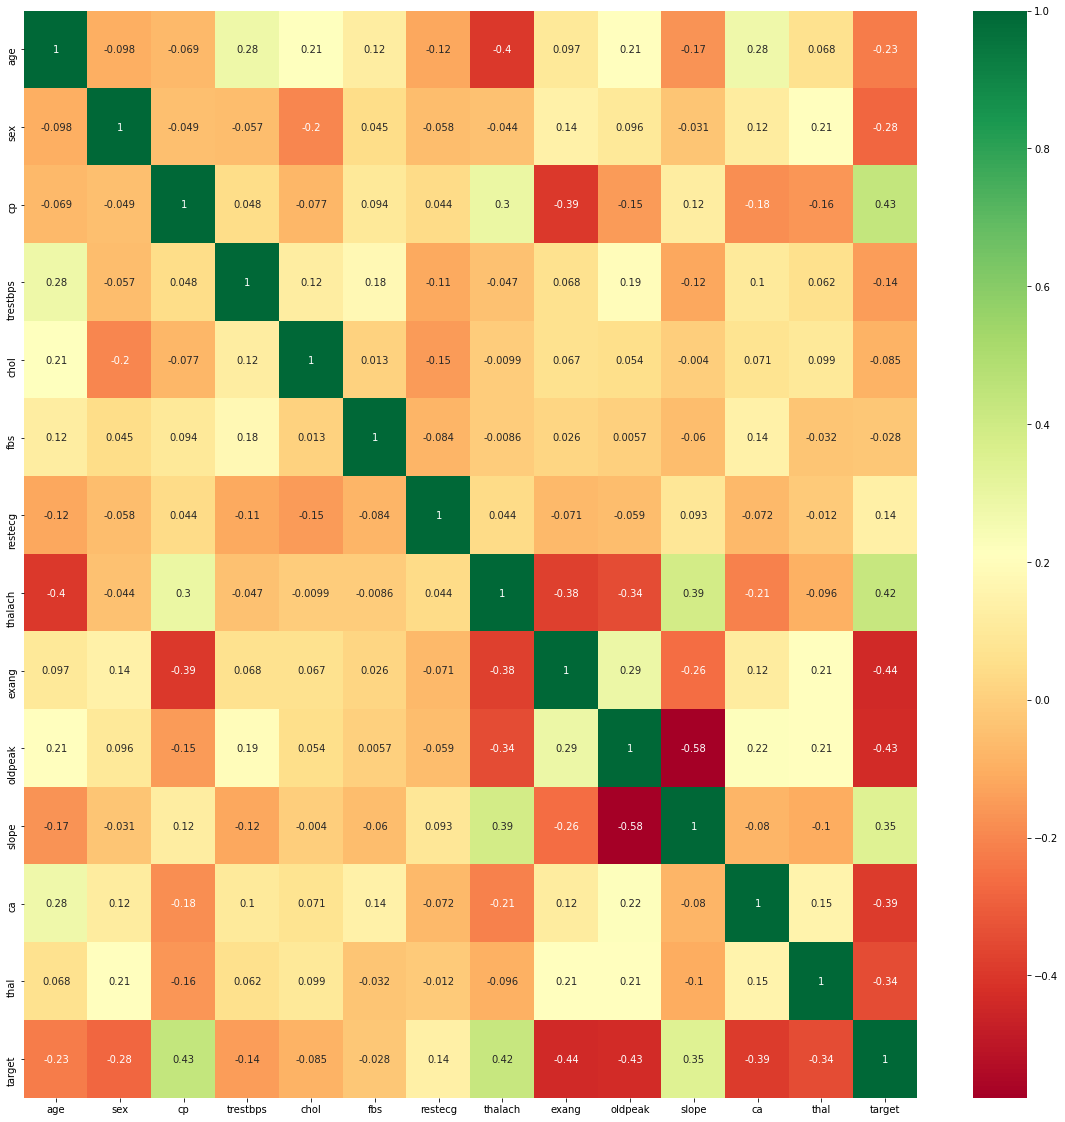

In [10]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd82a5eae50>,
      dtype=object)

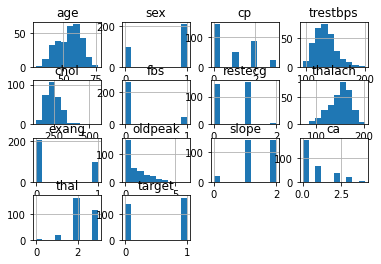

In [11]:
df.hist()

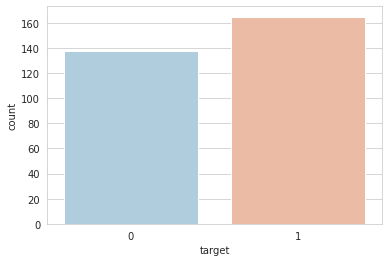

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

## Data Processing
After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. First, I'll use the get_dummies method to create dummy columns for categorical variables.

In [13]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [15]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [16]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [17]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

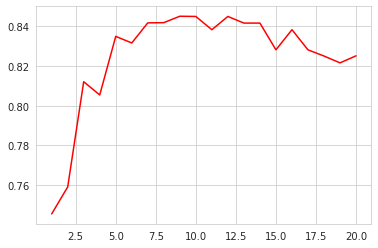

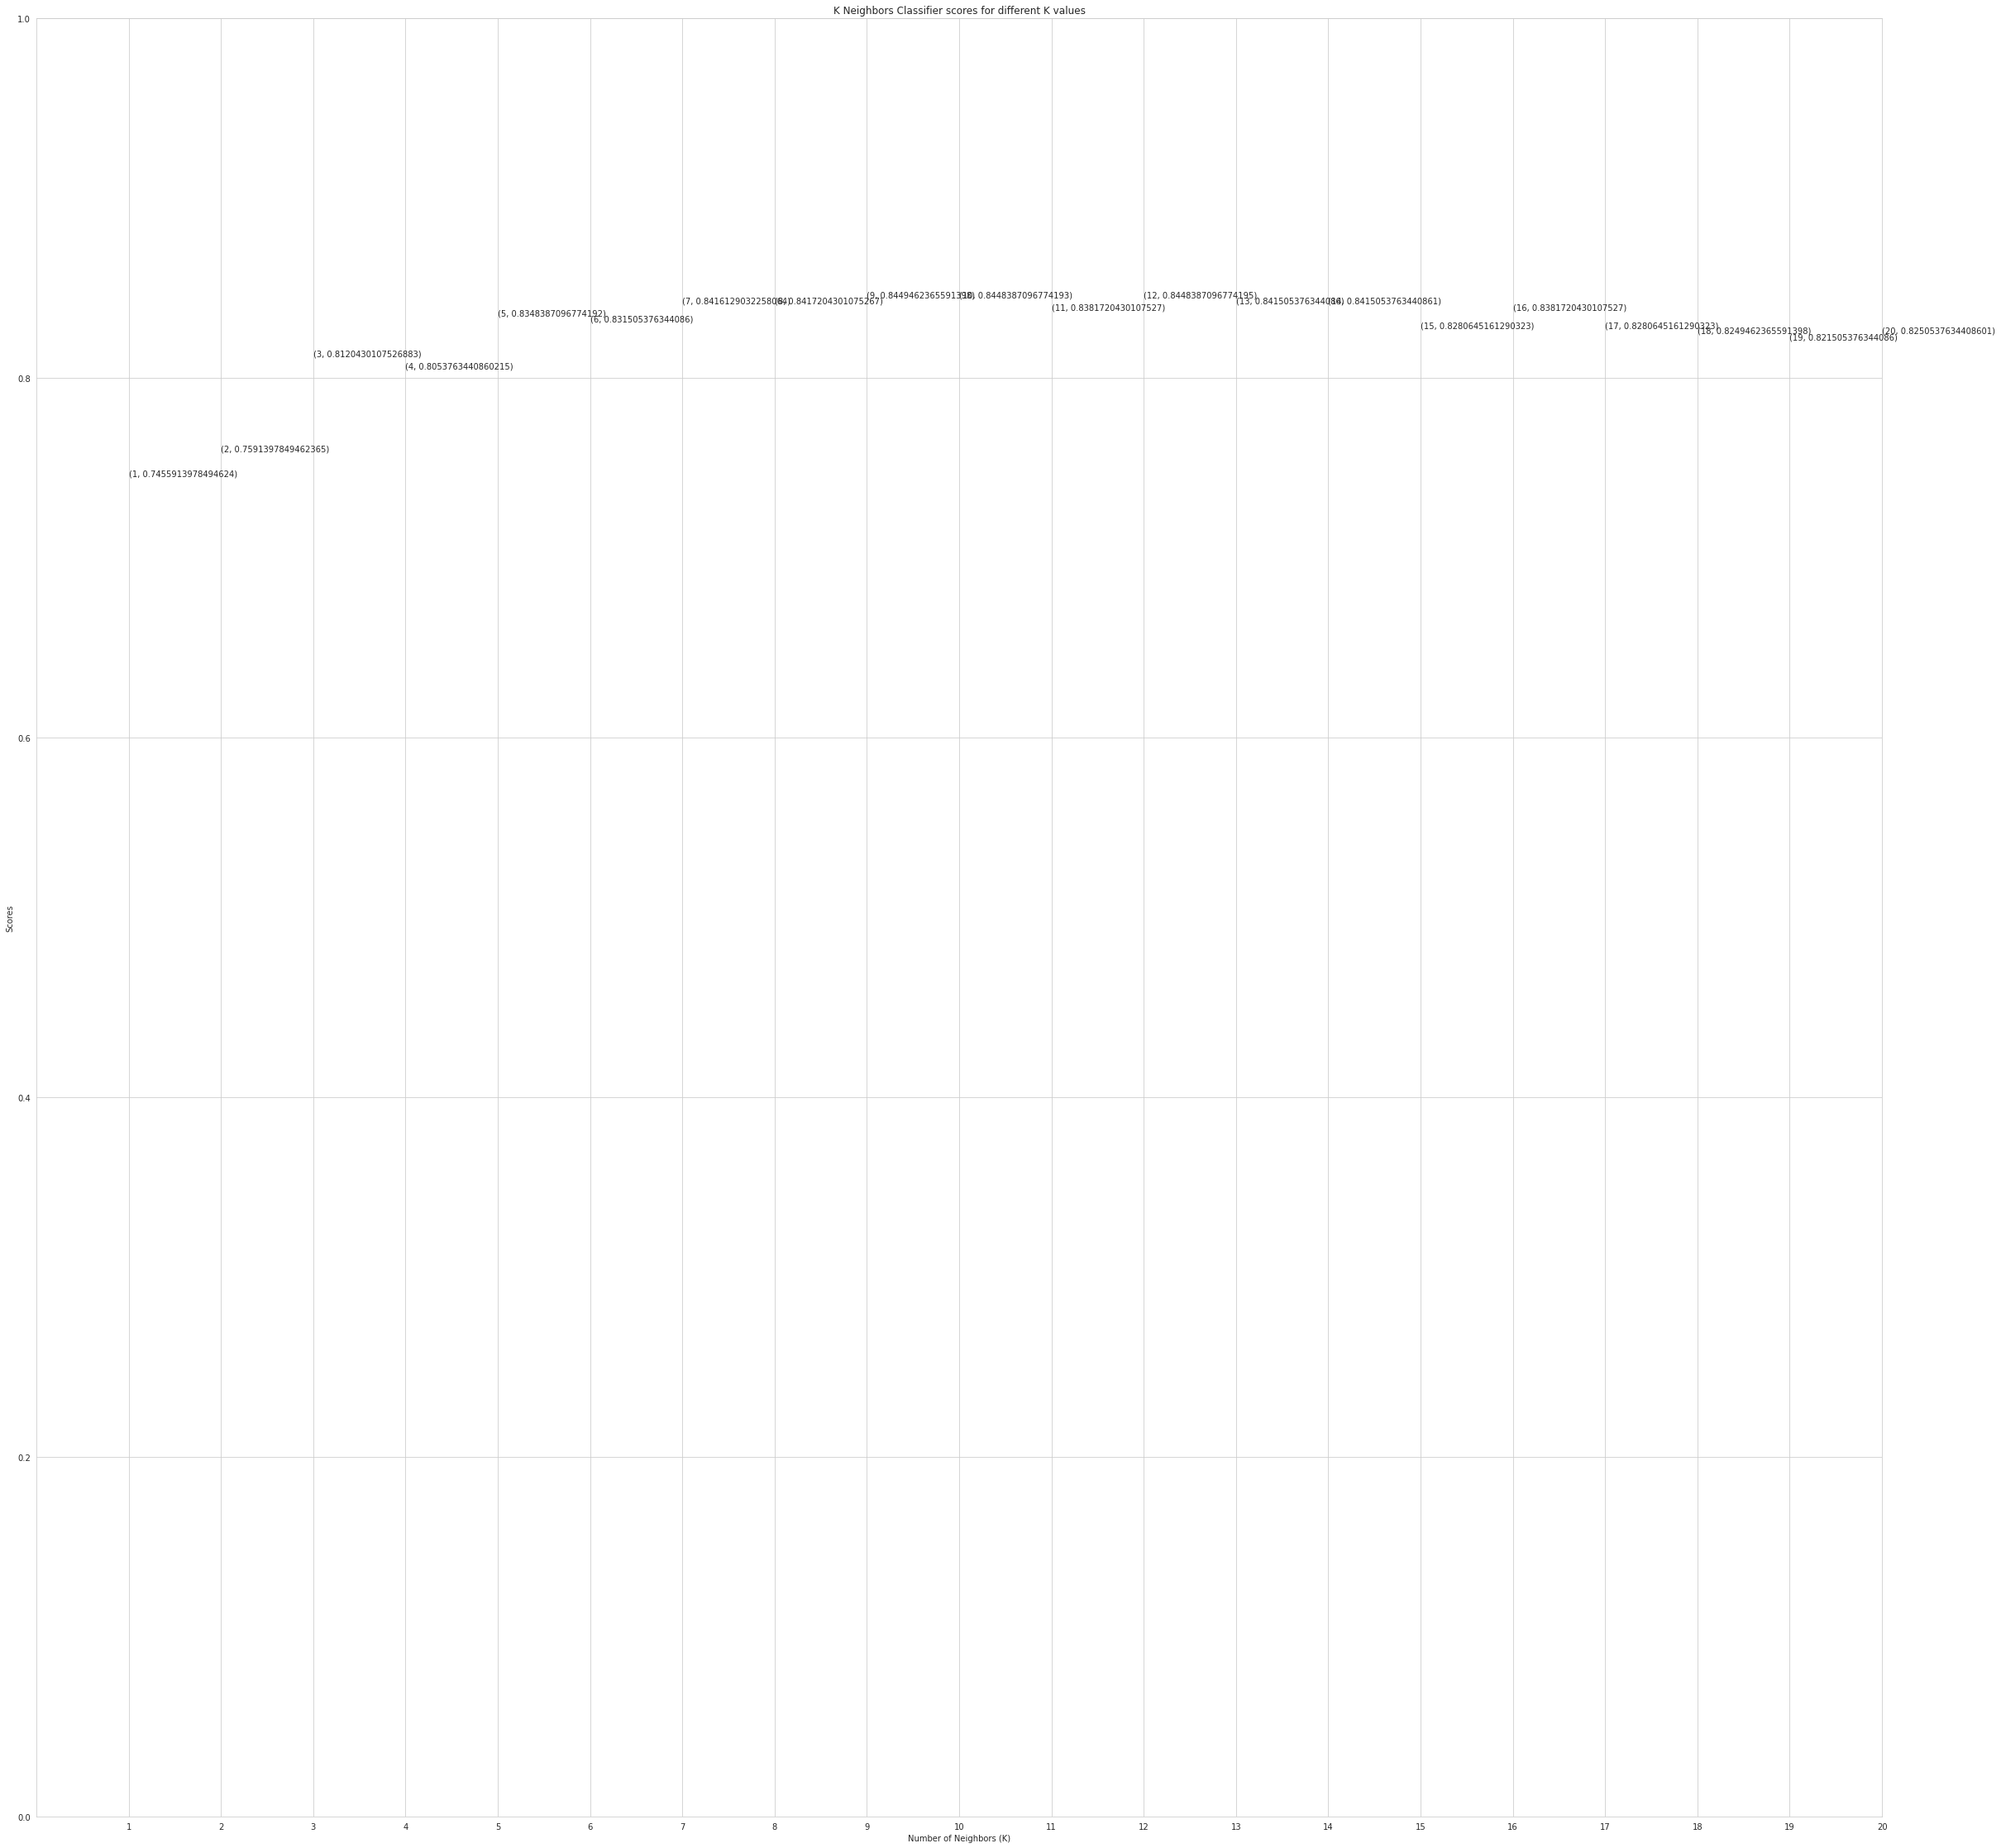

In [18]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
plt.figure(figsize=(40,40))
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [19]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [20]:
score.mean()

0.8448387096774195